## 1. Import libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load dataset


In [18]:
df = pd.read_csv('../data/cust_churn.csv')


In [19]:
shape = df.shape

In [20]:
print(f"Number of Columns: {shape[1]}")
print(f'Number of Rows: {shape[0]}')

Number of Columns: 21
Number of Rows: 30000


## First Five Rows

In [22]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST8DC4FA8E,Male,0,Yes,Yes,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,72.35,361.75,Yes
1,CUSTCC1EE3C7,Female,0,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.00,18.00,No
2,1832-PEUTS,Male,0,Yes,Yes,62,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),89.10,5411.65,No
3,CUSTF3B77714,Female,0,Yes,No,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),35.29,2505.59,No
4,CUST9BBE49A1,Male,0,No,No,20,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),58.44,1110.36,No


In [23]:
print("\nData Types:")
print(df.dtypes)


Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


### Checking for missing Values

In [24]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Churn Distribution

In [25]:
print("\nChurn Distribution:")
print(df['Churn'].value_counts(normalize=True))


Churn Distribution:
Churn
No     0.734867
Yes    0.265133
Name: proportion, dtype: float64


## Univariate Analysis – Categorical Features

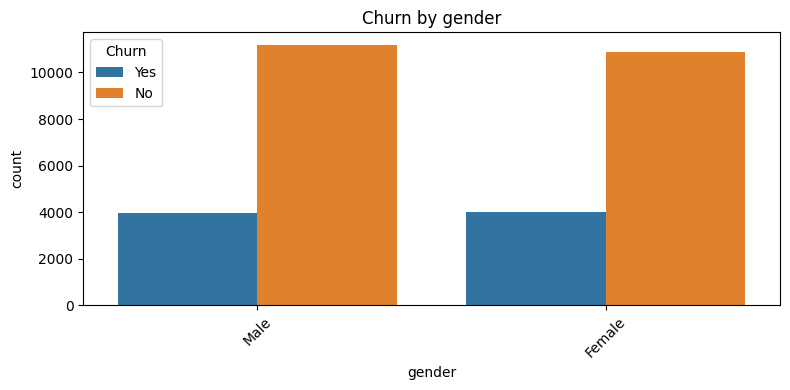

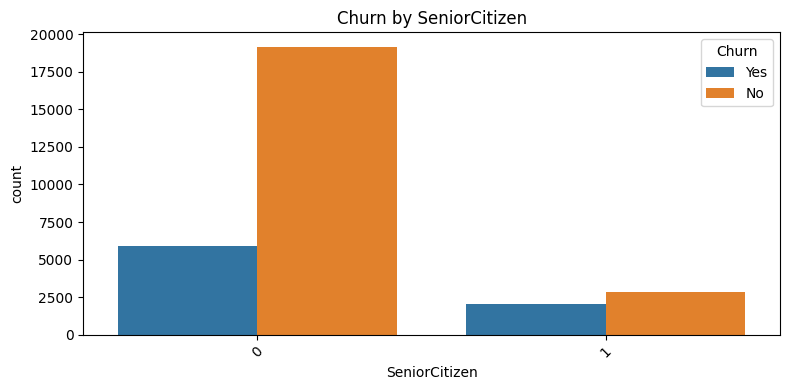

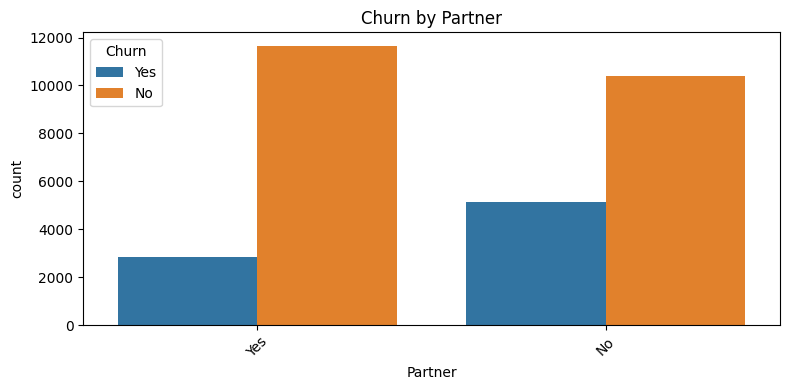

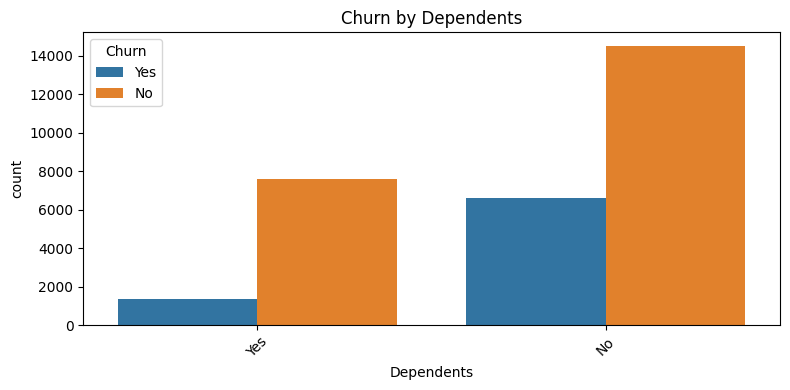

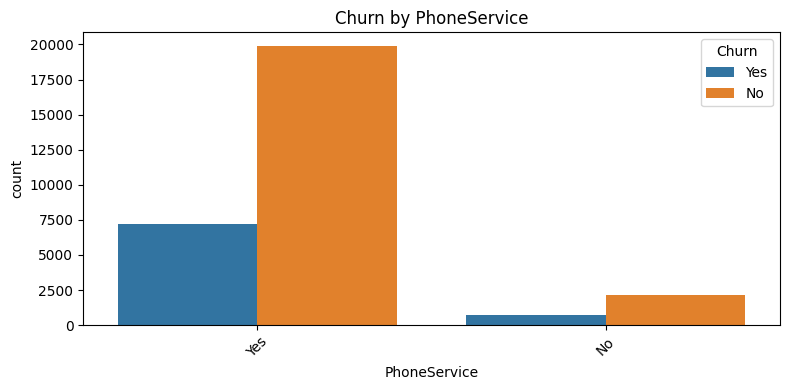

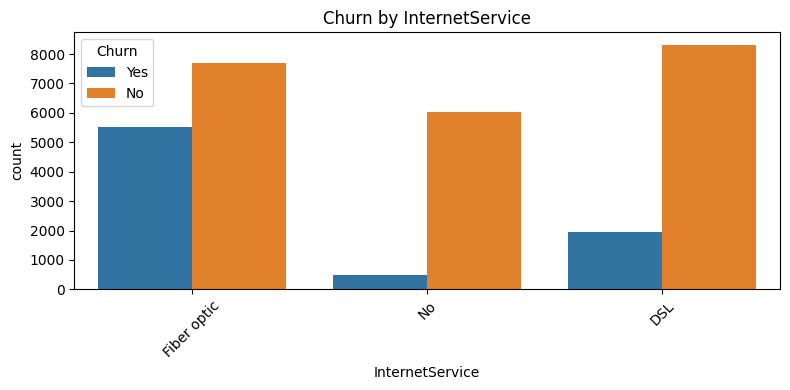

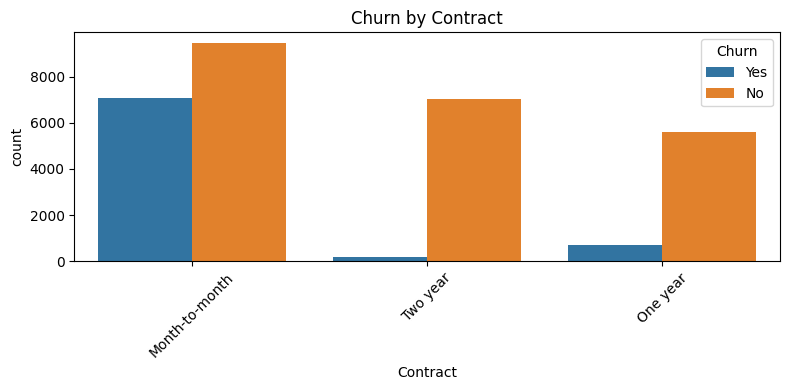

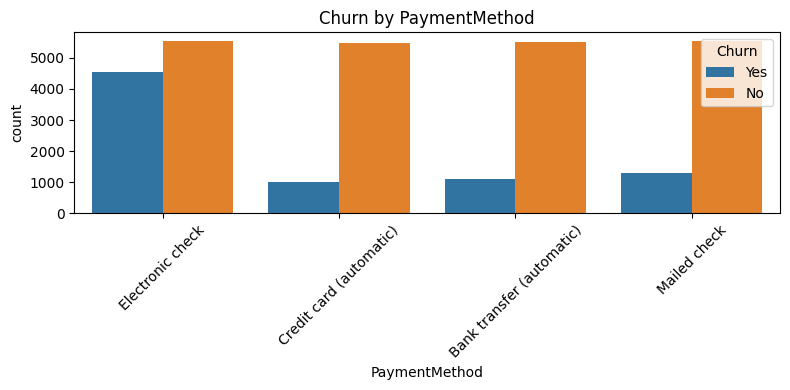

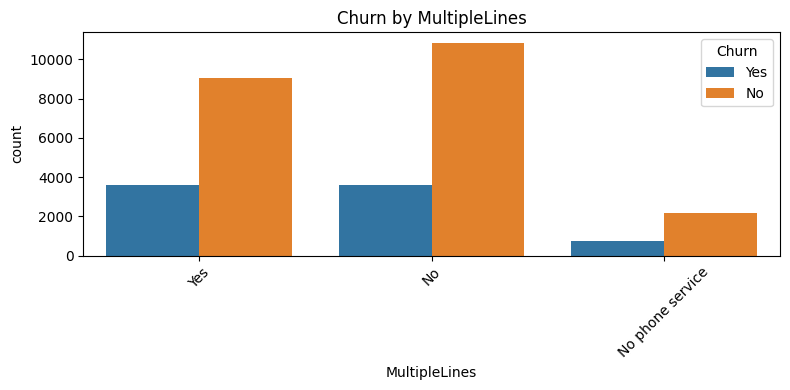

In [26]:
def plot_by_churn(col):
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
            'PhoneService', 'InternetService', 'Contract', 
            'PaymentMethod', 'MultipleLines']:
    plot_by_churn(col)


In [27]:
#Example Columns:
columns = list(df.columns)
columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

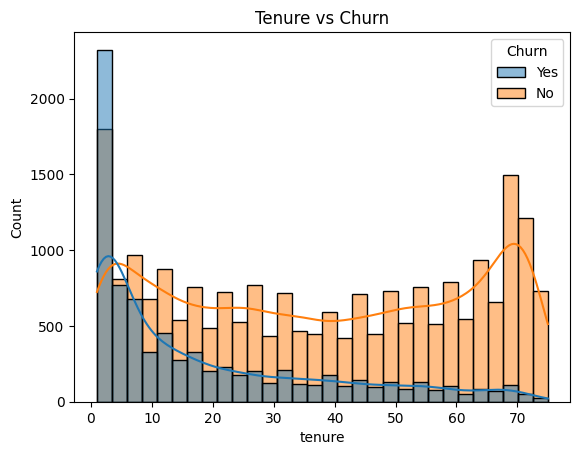

In [28]:
# Tenure
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title("Tenure vs Churn")
plt.show()

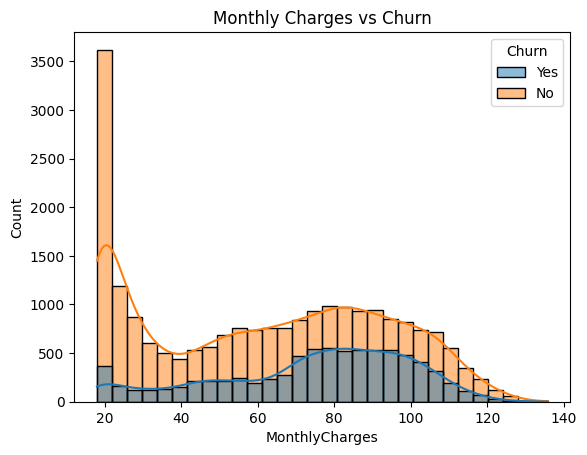

In [29]:
# Monthly Charges
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, bins=30)
plt.title("Monthly Charges vs Churn")
plt.show()


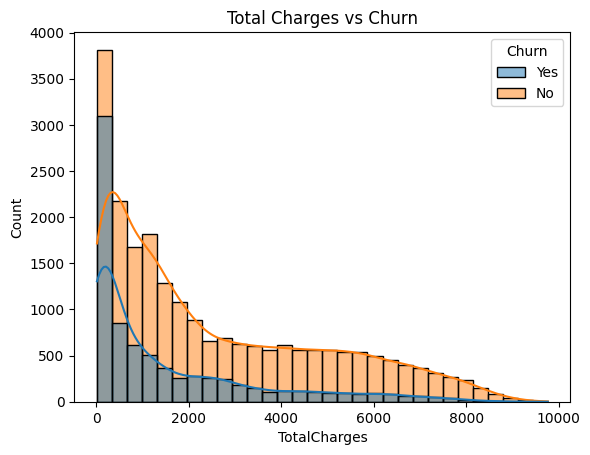

In [30]:
# Total Charges
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, bins=30)
plt.title("Total Charges vs Churn")
plt.show()

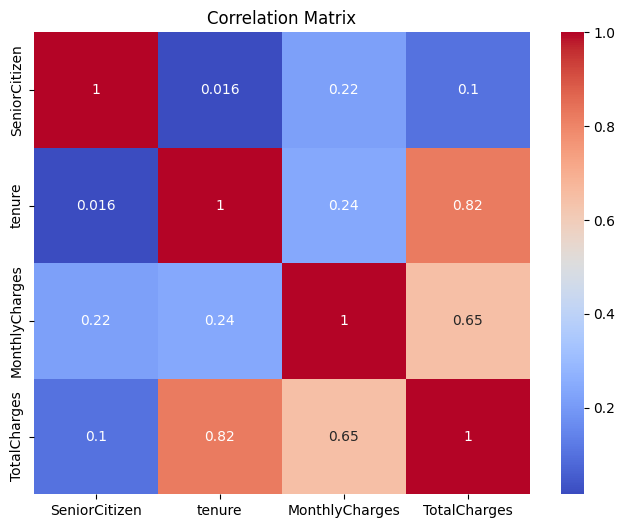

In [31]:
# Correlation heatmap (numerical only)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [32]:
summary = df.groupby('Churn').agg({
    'tenure': ['mean', 'median'],
    'MonthlyCharges': ['mean', 'median'],
    'TotalCharges': ['mean', 'median'],
    'SeniorCitizen': 'mean'
}).T

summary


Churn                           No          Yes
tenure         mean      37.683571    17.990822
               median    38.000000    10.000000
MonthlyCharges mean      61.774967    74.528363
               median    64.150000    79.490000
TotalCharges   mean    2568.976800  1518.424888
               median  1719.050000   676.525000
SeniorCitizen  mean       0.129956     0.254715

| Feature            | Churn Risk               | What It Suggests                                 |
| ------------------ | ------------------------ | ------------------------------------------------ |
| Contract Type      | High in Month-to-Month   | Most important categorical churn predictor    |
| Internet Service   | High in Fiber Optic      | Fiber users may expect higher service or pricing |
| Payment Method     | High in Electronic Check | Manual payments → More likely to leave           |
| Partner/Dependents | Lower risk if present    | Family users = more stability                    |
| Gender             | Little to no difference  | Not useful for prediction                        |


In [33]:
#Drop irrelavant columns

df.drop(['customerID'], inplace=True, axis=1)

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,7,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,72.35,361.75,Yes
1,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.00,18.00,No
2,Male,0,Yes,Yes,62,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),89.10,5411.65,No
3,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),35.29,2505.59,No
4,Male,0,No,No,20,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),58.44,1110.36,No


In [35]:
df['Churn'] = df['Churn'].map({"Yes" : 1, "No" : 0})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,7,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,72.35,361.75,1
1,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.00,18.00,0
2,Male,0,Yes,Yes,62,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),89.10,5411.65,0
3,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),35.29,2505.59,0
4,Male,0,No,No,20,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),58.44,1110.36,0


In [36]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [37]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [38]:
df['is_autopay'] = df['PaymentMethod'].apply(lambda x: 1 if 'automatic' in x.lower() else 0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,is_autopay
0,Male,0,Yes,Yes,7,Yes,Yes,Fiber optic,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,72.35,361.75,1,0
1,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.00,18.00,0,0
2,Male,0,Yes,Yes,62,Yes,Yes,Fiber optic,No,No,...,No,Yes,No,Two year,Yes,Credit card (automatic),89.10,5411.65,0,1
3,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),35.29,2505.59,0,1
4,Male,0,No,No,20,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),58.44,1110.36,0,1


In [39]:
df['contract_type'] = df['Contract'].map({
    'Month-to-month': 'Short',
    'One year':'Medium',
    'Two year': 'Long'
})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,is_autopay,contract_type
0,Male,0,Yes,Yes,7,Yes,Yes,Fiber optic,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,72.35,361.75,1,0,Short
1,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Month-to-month,No,Electronic check,18.00,18.00,0,0,Short
2,Male,0,Yes,Yes,62,Yes,Yes,Fiber optic,No,No,...,Yes,No,Two year,Yes,Credit card (automatic),89.10,5411.65,0,1,Long
3,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),35.29,2505.59,0,1,Long
4,Male,0,No,No,20,Yes,No,DSL,No,No,...,No,No,Month-to-month,Yes,Bank transfer (automatic),58.44,1110.36,0,1,Short


In [40]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 year'
    if tenure <= 24:
        return '1-2 years'
    elif tenure <= 48:
        return '2-4 years'
    else:
        return '4+ years'

df['tenure_group'] = df['tenure'].apply(tenure_group)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,is_autopay,contract_type,tenure_group
0,Male,0,Yes,Yes,7,Yes,Yes,Fiber optic,No,Yes,...,No,Month-to-month,Yes,Electronic check,72.35,361.75,1,0,Short,0-1 year
1,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,...,No internet service,Month-to-month,No,Electronic check,18.00,18.00,0,0,Short,0-1 year
2,Male,0,Yes,Yes,62,Yes,Yes,Fiber optic,No,No,...,No,Two year,Yes,Credit card (automatic),89.10,5411.65,0,1,Long,4+ years
3,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,...,No internet service,Two year,Yes,Bank transfer (automatic),35.29,2505.59,0,1,Long,4+ years
4,Male,0,No,No,20,Yes,No,DSL,No,No,...,No,Month-to-month,Yes,Bank transfer (automatic),58.44,1110.36,0,1,Short,1-2 years


In [41]:
df['hasfamily'] = ((df['Partner'] == 'Yes') | (df['Dependents'] == "Yes")).astype(int)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,is_autopay,contract_type,tenure_group,hasfamily
0,Male,0,Yes,Yes,7,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,Yes,Electronic check,72.35,361.75,1,0,Short,0-1 year,1
1,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,...,Month-to-month,No,Electronic check,18.00,18.00,0,0,Short,0-1 year,0
2,Male,0,Yes,Yes,62,Yes,Yes,Fiber optic,No,No,...,Two year,Yes,Credit card (automatic),89.10,5411.65,0,1,Long,4+ years,1
3,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,...,Two year,Yes,Bank transfer (automatic),35.29,2505.59,0,1,Long,4+ years,1
4,Male,0,No,No,20,Yes,No,DSL,No,No,...,Month-to-month,Yes,Bank transfer (automatic),58.44,1110.36,0,1,Short,1-2 years,0


## What is One-Hot Encoding?
    One-hot encoding is a technique where we create a new binary column for each unique category in a categorical feature.

In [42]:
# List of categorical columns
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod',
                    'contract_type', 'tenure_group']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded

,tenure,MonthlyCharges,TotalCharges,Churn,is_autopay,hasfamily,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,contract_type_Medium,contract_type_Short,tenure_group_1-2 years,tenure_group_2-4 years,tenure_group_4+ years
0,7,72.35,361.75,1,0,1,True,False,True,True,...,False,True,False,True,False,False,True,False,False,False
1,4,18.00,18.00,0,0,0,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,62,89.10,5411.65,0,1,1,True,False,True,True,...,True,True,True,False,False,False,False,False,False,True
3,71,35.29,2505.59,0,1,1,False,False,True,False,...,True,True,False,False,False,False,False,False,False,True
4,20,58.44,1110.36,0,1,0,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,41,31.57,1389.08,1,0,1,True,True,True,False,...,False,True,False,True,False,False,True,False,True,False
29996,53,98.02,5489.12,0,0,1,False,False,True,False,...,False,False,False,True,False,False,True,False,False,True
29997,72,82.74,5957.28,0,1,1,True,True,True,False,...,True,True,True,False,False,False,False,False,False,True
29998,65,28.38,1901.46,0,1,1,False,False,True,False,...,True,True,True,False,False,False,False,False,False,True


In [43]:
print("Final Dataset Check:")
print(f'Shape: {df_encoded.shape}')

Final Dataset Check:
Shape: (30000, 38)


| Step                | What You Did         | Why It Matters            | Real Insight              |
| ------------------- | -------------------- | ------------------------- | ------------------------- |
| Drop ID             | Removed `customerID` | Not useful for modeling   | Avoid overfitting         |
| Encode Target       | `Churn` → 0/1        | Needed for ML             | Binary classification     |
| Fix Charges         | Convert & clean      | Numeric operations needed | Predictive of loyalty     |
| Add `is_autopay`    | New binary feature   | Linked to retention       | Auto-pay = low churn      |
| Add `contract_type` | Group durations      | Easier modeling           | Short = churn risk        |
| Add `tenure_group`  | Loyalty buckets      | Feature importance        | Short tenure = high churn |
| Add `has_family`    | Binary family tag    | Behavioral predictor      | Families churn less       |
| Encode Categorical  | One-hot encoding     | Model-compatible          | Binary signal per group   |


In [39]:
df_encoded.to_csv('../data/churn_feature_engineered.csv', index=False)


In [52]:
X = pd.read_csv('../data/churn_feature_engineered.csv') 

In [ ]:
X.head()

,tenure,MonthlyCharges,TotalCharges,Churn,is_autopay,hasfamily,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,contract_type_Medium,contract_type_Short,tenure_group_1-2 years,tenure_group_2-4 years,tenure_group_4+ years
0,7,72.35,361.75,1,0,1,True,False,True,True,...,False,True,False,True,False,False,True,False,False,False
1,4,18.00,18.00,0,0,0,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,62,89.10,5411.65,0,1,1,True,False,True,True,...,True,True,True,False,False,False,False,False,False,True
3,71,35.29,2505.59,0,1,1,False,False,True,False,...,True,True,False,False,False,False,False,False,False,True
4,20,58.44,1110.36,0,1,0,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False


In [59]:
X.drop(columns=['Churn'], inplace=True)

In [60]:
columns = X.columns.tolist()
columns

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'is_autopay',
 'hasfamily',
 'gender_Male',
 'SeniorCitizen_1',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'contract_type_Medium',
 'contract_type_Short',
 'tenure_group_1-2 years',
 'tenure_group_2-4 years',
 'tenure_group_4+ years']

In [61]:
import joblib
joblib.dump(columns, '../model/columns.pkl')

['../model/columns.pkl']

In [7]:
import pandas as pd

df = pd.read_csv("../data/churn_feature_engineered.csv")
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,is_autopay,hasfamily,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,contract_type_Medium,contract_type_Short,tenure_group_1-2 years,tenure_group_2-4 years,tenure_group_4+ years
0,7,72.35,361.75,1,0,1,True,False,True,True,...,False,True,False,True,False,False,True,False,False,False
1,4,18.00,18.00,0,0,0,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,62,89.10,5411.65,0,1,1,True,False,True,True,...,True,True,True,False,False,False,False,False,False,True
3,71,35.29,2505.59,0,1,1,False,False,True,False,...,True,True,False,False,False,False,False,False,False,True
4,20,58.44,1110.36,0,1,0,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False


### Separate input features and target

In [8]:
x = df.drop('Churn', axis=1)
y = df['Churn']


### Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

# 80% for training and 20% for validation
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

### Training Logistic Regression Model (Baseline)

In [69]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=5000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

### Train RandomForest Model Classifier (Advanced)

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

## Predictions

In [71]:
y_pred_lr = lr.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print('ROC Curve: ', roc_auc_score(y_true, y_pred))
    print()

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "RandomForestClassifier")

Evaluation for Logistic Regression
Accuracy: 0.8043333333333333
Precision: 0.664561957379637
Recall: 0.5292269013199246
F1 Score: 0.5892232330300909
ROC Curve:  0.7164165806214047

Evaluation for RandomForestClassifier
Accuracy: 0.921
Precision: 0.8812286689419795
Recall: 0.8114393463230672
F1 Score: 0.8448952879581152
ROC Curve:  0.8859873075457476



| Metric        | Logistic Regression | Random Forest | Best |
| ------------- | ------------------- | ------------- | ------ |
| **Accuracy**  | 80.4%               | 92.1%         | RF   |
| **Precision** | 66.5%               | 88.1%         | RF   |
| **Recall**    | 52.9%               | 81.1%         | RF   |
| **F1 Score**  | 58.9%               | 84.5%         | RF   |
| **ROC AUC**   | 71.6%               | 88.6%         | RF   |


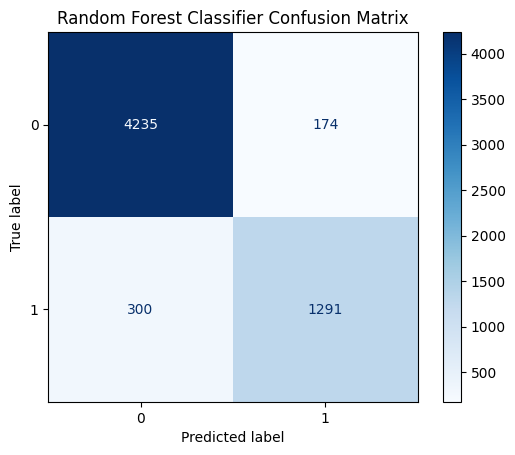

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test, cmap="Blues")
plt.title("Random Forest Classifier Confusion Matrix")
plt.show()

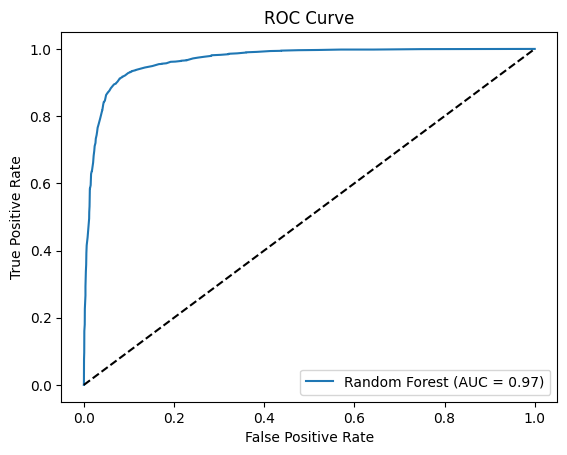

In [74]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = rf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [50]:
import joblib
joblib.dump(rf, "../model/churn_model_rf.pk1")

['../model/churn_model_rf.pk1']

## Hyperparameter Tuning with GridSearchCV

In [75]:
import pandas as pd

df = pd.read_csv("../data/churn_feature_engineered.csv")

x = df.drop('Churn', axis=1)
y = df['Churn']


In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [79]:
y_train.value_counts(normalize=True)


Churn
0    0.734875
1    0.265125
Name: proportion, dtype: float64

In [78]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='recall',  # Focused on catching more churners
    n_jobs=-1,  # Run in parallel
    verbose=2
)

grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


KeyboardInterrupt: 

In [58]:
print("Best Parameters Found:")
print(grid_search.best_params_)


Best Parameters Found:
{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [2]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)
y_proba = best_rf.predict_proba(x_test)[:,1]

print("classification Report: ")
print(classification_report(y_test, y_pred))

print("ROC Curve Score:")
print(roc_auc_score(y_test, y_proba))

NameError: name 'grid_search' is not defined

In [60]:
import joblib
joblib.dump(best_rf, '../model/churn_model_rf_tuned.pkl')
print("Tuned Random Forest saved.")


Tuned Random Forest saved.


In [61]:
evaluate_model(y_test, y_pred, "RandomForestClassifier Tuned")

Evaluation for RandomForestClassifier Tuned
Accuracy: 0.9228333333333333
Precision: 0.8765020026702269
Recall: 0.825267127592709
F1 Score: 0.8501133052767886
ROC Curve:  0.8916537497795707



| Metric    | Default RF | Tuned RF |
| --------- | ---------- | -------- |
| Accuracy  | 92.1%      | 92.3     |
| Precision | 88.1%      | 88.6     |
| Recall    | 81.1%      | 82.6     |
| F1 Score  | 84.5%      | 85.1     |
| ROC AUC   | 88.6%      | 89.6     |


In [5]:
import pandas as pd
import joblib

# Load your trained Random Forest model
model = joblib.load('../model/churn_model_rf_tuned.pkl')

# Load the same dataset used for model input (features only, no target column)
df = pd.read_csv('../data/churn_feature_engineered.csv')

# Optional: keep a copy of original for joining later if you removed customer info
df_original = df.copy()


In [6]:
X = df.drop('Churn', axis=1)


In [7]:
# predict_proba returns [prob_not_churn, prob_churn]
churn_probabilities = model.predict_proba(X)[:, 1]  # Take probability of class 1 (Churn)


In [ ]:
df['Churn_Probability'] = churn_probabilities


In [9]:
df['Predicted_Churn'] = model.predict(X)

In [10]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,is_autopay,hasfamily,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,contract_type_Medium,contract_type_Short,tenure_group_1-2 years,tenure_group_2-4 years,tenure_group_4+ years,Churn_Probability,Predicted_Churn
0,7,72.35,361.75,1,0,1,True,False,True,True,...,False,True,False,False,True,False,False,False,0.942215,1
1,4,18.00,18.00,0,0,0,False,False,False,False,...,False,True,False,False,True,False,False,False,0.093415,0
2,62,89.10,5411.65,0,1,1,True,False,True,True,...,True,False,False,False,False,False,False,True,0.005000,0
3,71,35.29,2505.59,0,1,1,False,False,True,False,...,False,False,False,False,False,False,False,True,0.000000,0
4,20,58.44,1110.36,0,1,0,True,False,False,False,...,False,False,False,False,True,True,False,False,0.072587,0


In [12]:
df.to_csv('../data/final_churn_data_for_pbi.csv', index=False)


In [62]:
model = joblib.load('C:/customer-churn-project/model/churn_model_rf_tuned.pkl')

In [64]:
y_pred = model.predict(x_test)
pd.Series(y_pred).value_counts(normalize=True)

0    0.750333
1    0.249667
Name: proportion, dtype: float64

In [80]:
import sys
print(sys.executable)

c:\Python\python.exe


In [81]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [82]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Random Forest with class_weight
rf_model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,
    max_depth=8,
    random_state=42
)

In [84]:

# XGBoost with imbalance control
xgb_model = XGBClassifier(
    scale_pos_weight=2.8,  # Approx (no churn / churn)
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)


In [85]:

# Soft voting ensemble (uses predicted probabilities)
hybrid_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    voting='soft'
)


In [86]:
# Fit ensemble
hybrid_model.fit(X_train, y_train)

c:\Python\lib\site-packages\xgboost\training.py:183: UserWarning: [11:24:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=8,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            f...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [87]:
y_pred = hybrid_model.predict(X_test)
y_prob = hybrid_model.predict_proba(X_test)[:, 1]

In [89]:

from sklearn.metrics import confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

[[3480  910]
 [ 243 1367]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      4390
           1       0.60      0.85      0.70      1610

    accuracy                           0.81      6000
   macro avg       0.77      0.82      0.78      6000
weighted avg       0.85      0.81      0.82      6000

ROC AUC Score: 0.8979835594731107


In [90]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Get predicted probabilities for the positive class (churn=1)
y_probs = hybrid_model.predict_proba(X_test)[:, 1]

print("Threshold tuning results:\n")
thresholds = np.arange(0.1, 0.9, 0.05)

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_thresh, average='binary')
    print(f"Threshold: {thresh:.2f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1 Score: {f1:.3f}")


Threshold tuning results:

Threshold: 0.10 | Precision: 0.377 | Recall: 0.996 | F1 Score: 0.547
Threshold: 0.15 | Precision: 0.405 | Recall: 0.986 | F1 Score: 0.574
Threshold: 0.20 | Precision: 0.434 | Recall: 0.977 | F1 Score: 0.601
Threshold: 0.25 | Precision: 0.460 | Recall: 0.966 | F1 Score: 0.624
Threshold: 0.30 | Precision: 0.491 | Recall: 0.951 | F1 Score: 0.647
Threshold: 0.35 | Precision: 0.514 | Recall: 0.937 | F1 Score: 0.664
Threshold: 0.40 | Precision: 0.542 | Recall: 0.911 | F1 Score: 0.679
Threshold: 0.45 | Precision: 0.573 | Recall: 0.884 | F1 Score: 0.695
Threshold: 0.50 | Precision: 0.600 | Recall: 0.849 | F1 Score: 0.703
Threshold: 0.55 | Precision: 0.628 | Recall: 0.810 | F1 Score: 0.707
Threshold: 0.60 | Precision: 0.656 | Recall: 0.753 | F1 Score: 0.702
Threshold: 0.65 | Precision: 0.683 | Recall: 0.683 | F1 Score: 0.683
Threshold: 0.70 | Precision: 0.726 | Recall: 0.607 | F1 Score: 0.661
Threshold: 0.75 | Precision: 0.760 | Recall: 0.497 | F1 Score: 0.601
Thresho

In [91]:
y_pred_final = (y_probs >= 0.55).astype(int)

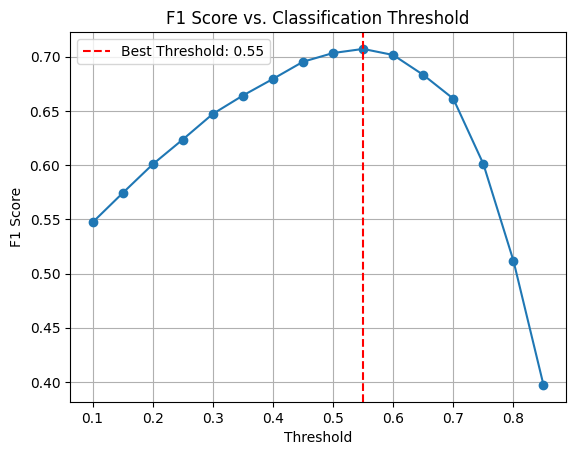

In [92]:
import matplotlib.pyplot as plt

thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = [precision_recall_fscore_support(y_test, (y_probs >= t).astype(int), average='binary')[2] for t in thresholds]

plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(0.55, color='red', linestyle='--', label='Best Threshold: 0.55')
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Classification Threshold")
plt.legend()
plt.grid()
plt.show()


In [93]:
import joblib
joblib.dump(hybrid_model, "../model/hybrid_model.pk1")

['../model/hybrid_model.pk1']